# Project 3

In [38]:
from astropy.io import fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
def pause():
    ## pauses until a keyboard entry (e.g. carrage return)#     
    print('\r')     
    dummy = input('Pause')     
    print('\r')

# Part Ai

Loads in the earliest time images, then plots the data from the images in grayscale.

In [20]:
k_rdc_1702 = pyfits.open('20050702.1702.HW.K.P.rdc.fits.gz')
k_contrast_1702 = pyfits.open('20050702.1702.HW.K.P.contrast.fits.gz')
r_rdc_1702 = pyfits.open('20050702.1702.HW.R.P.rdc.fits.gz')
r_contrast_1702 = pyfits.open('20050702.1702.HW.R.P.contrast.fits.gz')

Displaying earliest rdc/contrast images...


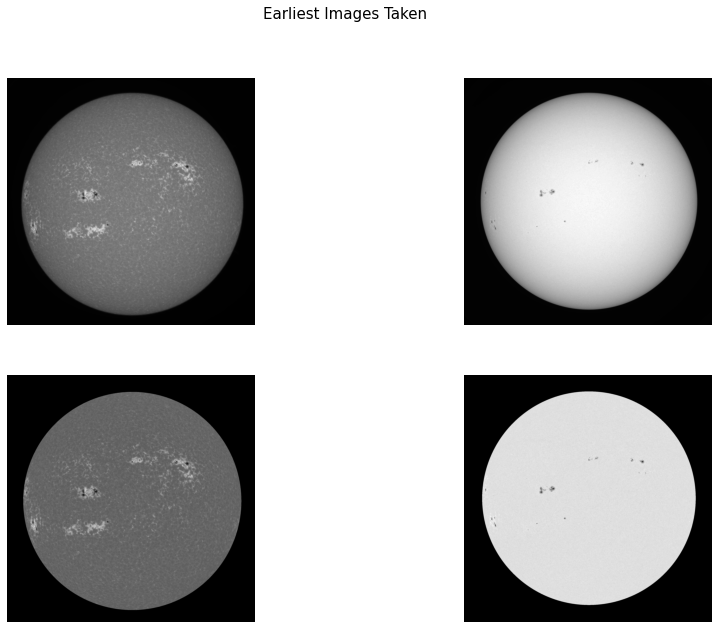

In [37]:
print('Part Ai: Displaying earliest rdc/contrast images...')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))
fig.suptitle('Earliest Images Taken',fontsize = 15)

im1=k_rdc_1702[0].data
k_rdc_1702.close()
ax1.imshow(im1, cmap = 'gray')
ax1.axis('off')

im2=r_rdc_1702[0].data
r_rdc_1702.close()
ax2.imshow(im2, cmap = 'gray')
ax2.axis('off')

im3=k_contrast_1702[0].data
k_contrast_1702.close()
ax3.imshow(im3, cmap = 'gray')
ax3.axis('off')

im4=r_contrast_1702[0].data
r_contrast_1702.close()
ax4.imshow(im4, cmap = 'gray')
ax4.axis('off')

plt.show()

In [39]:
pause()


Pause



# Part Aii

Re-plots the images from part Ai with a horizontal cut through them, then creates scatter plots showing the intensity values along these cuts.

Part Aii: Displaying earliest rdc/contrast images with horizontal cuts...


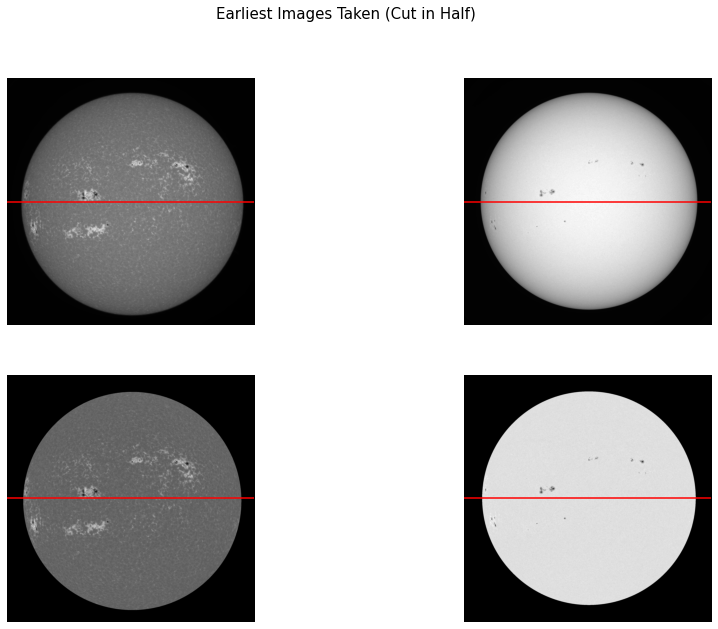

In [55]:
print('Part Aii: Displaying earliest rdc/contrast images with horizontal cuts...')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))
fig.suptitle('Earliest Images Taken (Cut in Half)', fontsize = 15)

im1=k_rdc_1702[0].data
k_rdc_1702.close()
ax1.imshow(im1, cmap = 'gray')
ax1.axhline(y=1024,color='r')
ax1.axis('off')

im2=r_rdc_1702[0].data
r_rdc_1702.close()
ax2.imshow(im2, cmap = 'gray')
ax2.axhline(y=1024,color='r')
ax2.axis('off')

im3=k_contrast_1702[0].data
k_contrast_1702.close()
ax3.imshow(im3, cmap = 'gray')
ax3.axhline(y=1024,color='r')
ax3.axis('off')

im4=r_contrast_1702[0].data
r_contrast_1702.close()
ax4.imshow(im4, cmap = 'gray')
ax4.axhline(y=1024,color='r')
ax4.axis('off')

plt.show()

Part Aii: Scatter plots of the horizontal intensity values.


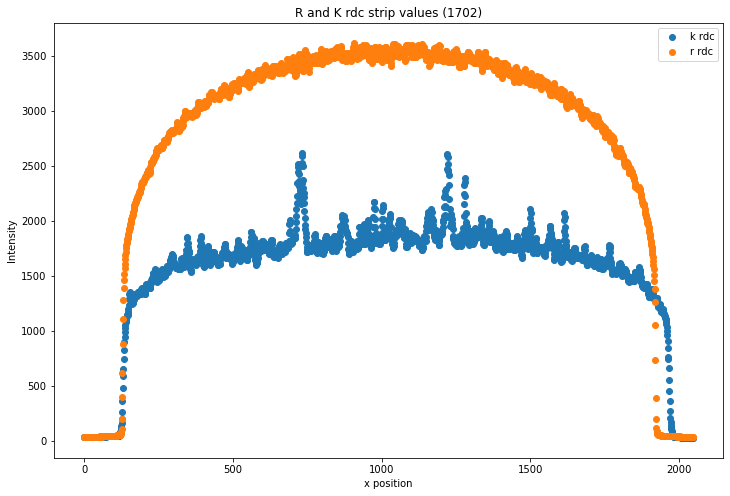

In [56]:
print('Part Aii: Scatter plots of the horizontal intensity values.')

plt.figure(figsize=(12,8))
plt.scatter(range(2048),im1[:,1024],label='k rdc')
plt.scatter(range(2048),im2[:,1024],label='r rdc')
plt.legend()
plt.title('R and K rdc strip values (1702)');plt.xlabel('x position');plt.ylabel('Intensity')
plt.show()

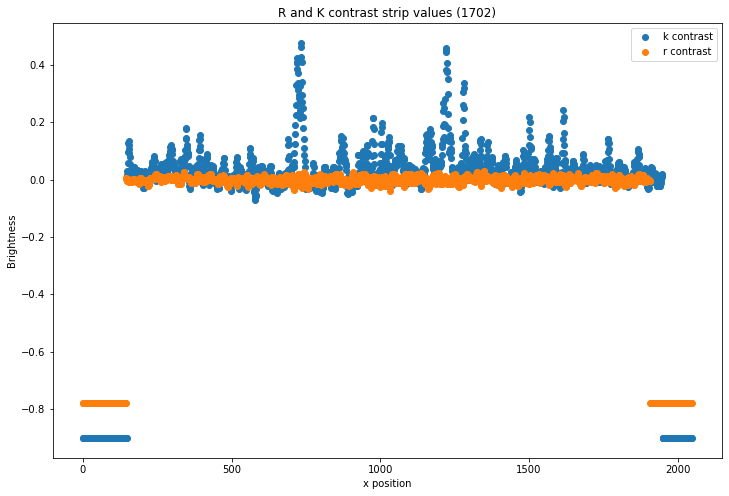

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(range(2048),im3[:,1024],label='k contrast')
plt.scatter(range(2048),im4[:,1024],label='r contrast')
plt.legend()
plt.title('R and K contrast strip values (1702)');plt.xlabel('x position');plt.ylabel('Brightness')
plt.show()

In [42]:
pause()


Pause



# Part Bi

Creates a list of files, grabs each header, then appends 3 different lists with the desired header value.

In [51]:
print('Part Bi: Loading in rdc header values for both filter types...')

k_images = ['20050702.1702.HW.K.P.rdc.fits.gz','20050702.1720.HW.K.P.rdc.fits.gz','20050702.1740.HW.K.P.rdc.fits.gz','20050702.1802.HW.K.P.rdc.fits.gz','20050702.1820.HW.K.P.rdc.fits.gz','20050702.1840.HW.K.P.rdc.fits.gz']
r_images = ['20050702.1702.HW.R.P.rdc.fits.gz','20050702.1720.HW.R.P.rdc.fits.gz','20050702.1740.HW.R.P.rdc.fits.gz','20050702.1802.HW.R.P.rdc.fits.gz','20050702.1820.HW.R.P.rdc.fits.gz','20050702.1840.HW.R.P.rdc.fits.gz']


#takes a list of files, grabs each header, then appends 3 different lists with the desired header value
def header_grab(file_list):
    dates = []
    avgwidths = [] #creating. empty lists to append values to
    rmsa = []
    for i in range(len(file_list)): #loops through list of files
        header=pyfits.getheader(file_list[i]) #gets the header from the desired file
        dates.append(header['JULDATE']) #gets JULDATE from header
        avgwidths.append(header['AVGWIDTH']) #gets AVGWIDTH from header
        rmsa.append(header['RMSA']) #gets RMSA from header
    return np.array(dates),np.array(avgwidths),np.array(rmsa)

Part Bi: Loading in rdc header values for both spectra types...


In [26]:
k_dates = header_grab(k_images)[0]
k_widths = header_grab(k_images)[1]
k_rmsa = header_grab(k_images)[2]

r_dates = header_grab(r_images)[0]
r_widths = header_grab(r_images)[1]
r_rmsa = header_grab(r_images)[2]

In [43]:
pause()


Pause



# Part Bii

Creates plots of Average Width vs Julian Date, and RMSA vs Julian Date of the rdc images.

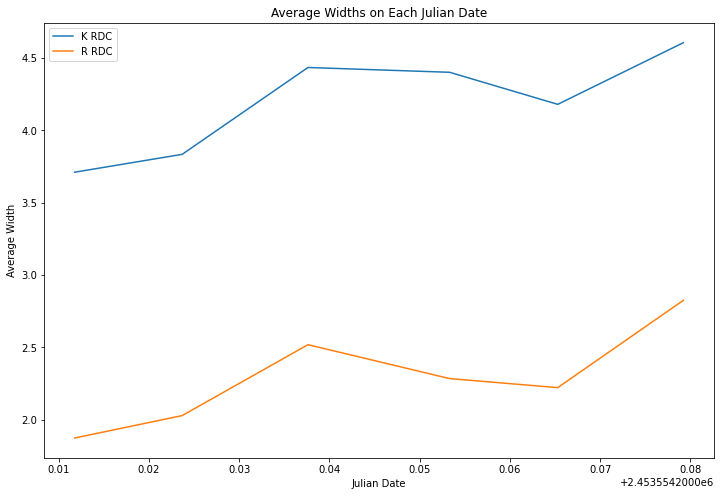

In [27]:
print('Part Bii: Plotting Average Width and RMSA values versus Julian Date...')

plt.figure(figsize=(12,8))
plt.plot(k_dates,k_widths,label='K RDC')
plt.plot(r_dates,r_widths,label='R RDC')
plt.legend()
plt.title('Average Widths on Each Julian Date');plt.xlabel('Julian Date');plt.ylabel('Average Width')
plt.show()

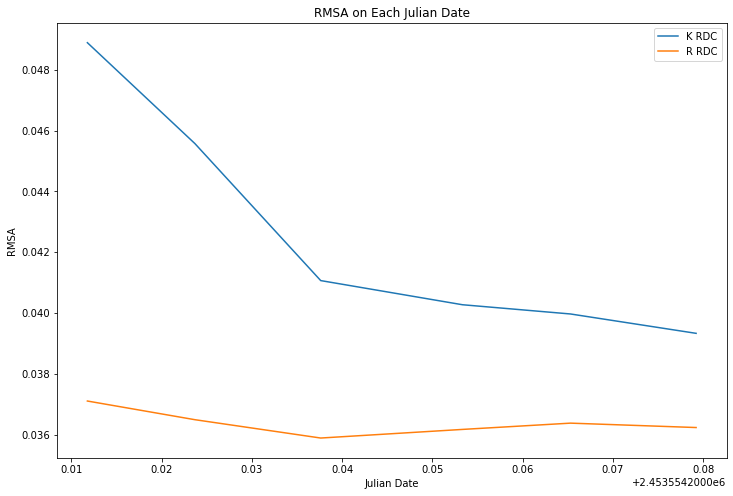

In [28]:
plt.figure(figsize=(12,8))
plt.plot(k_dates,k_rmsa,label='K RDC')
plt.plot(r_dates,r_rmsa,label='R RDC')
plt.legend()
plt.title('RMSA on Each Julian Date');plt.xlabel('Julian Date');plt.ylabel('RMSA')
plt.show()

In [44]:
pause()


Pause



# Part Ci

Loads in the 3 earliest conrast files, finds the intenisty of their solar disks, then makes two histograms showing their intensity over time.

In [29]:
print('Part Ci: Finding and histogramming intensity values for the first 3 images of both filter types...')

k_contrast_1702 = pyfits.open('20050702.1702.HW.K.P.contrast.fits.gz')
k_contrast_1720 = pyfits.open('20050702.1720.HW.K.P.contrast.fits.gz')
k_contrast_1740 = pyfits.open('20050702.1740.HW.K.P.contrast.fits.gz')

r_contrast_1702 = pyfits.open('20050702.1702.HW.R.P.contrast.fits.gz')
r_contrast_1720 = pyfits.open('20050702.1720.HW.R.P.contrast.fits.gz')
r_contrast_1740 = pyfits.open('20050702.1740.HW.R.P.contrast.fits.gz')

In [52]:
#takes a file and uses the position data to find where the intensity is greater than 0
def intensity_array(file):
    image=file[0].data #generating the positional data from the file
    file.close()

    location = np.where(image > 0) #finds the intensity greater than 0 at each pixel location

    return image[location] #returns the intensities at found positions

In [48]:
k_intensity_1702 = np.array(intensity_array(k_contrast_1702))
k_intensity_1720 = np.array(intensity_array(k_contrast_1720))
k_intensity_1740 = np.array(intensity_array(k_contrast_1740))

r_intensity_1702 = np.array(intensity_array(r_contrast_1702))
r_intensity_1720 = np.array(intensity_array(r_contrast_1720))
r_intensity_1740 = np.array(intensity_array(r_contrast_1740))

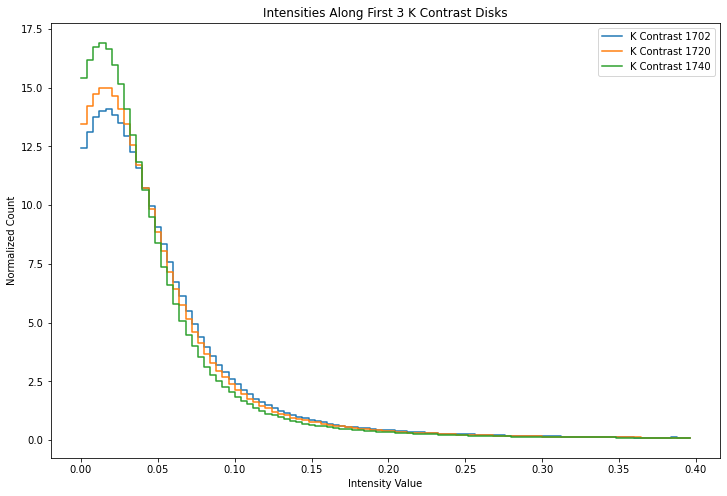

In [49]:
from scipy import integrate
fig = plt.figure(figsize=(12,8))
nbins = 100
hmin = 0
hmax = .4
hist_1,binv = np.histogram(k_intensity_1702,bins=nbins,range=(hmin,hmax))
binv=binv[0:nbins]
norm_1=integrate.trapz(hist_1,binv)
hist_1=hist_1/norm_1
plt.step(binv,hist_1,where='post',label='K Contrast 1702')

nbins = 100
hmin = 0
hmax = .4
hist_1,binv = np.histogram(k_intensity_1720,bins=nbins,range=(hmin,hmax))
binv=binv[0:nbins]
norm_1=integrate.trapz(hist_1,binv)
hist_1=hist_1/norm_1
plt.step(binv,hist_1,where='post',label='K Contrast 1720')

nbins = 100
hmin = 0
hmax = .4
hist_1,binv = np.histogram(k_intensity_1740,bins=nbins,range=(hmin,hmax))
binv=binv[0:nbins]
norm_1=integrate.trapz(hist_1,binv)
hist_1=hist_1/norm_1
plt.step(binv,hist_1,where='post',label='K Contrast 1740')

plt.legend()
plt.title('Intensities Along First 3 K Contrast Disks');plt.xlabel('Intensity Value');plt.ylabel('Normalized Count')
plt.show()

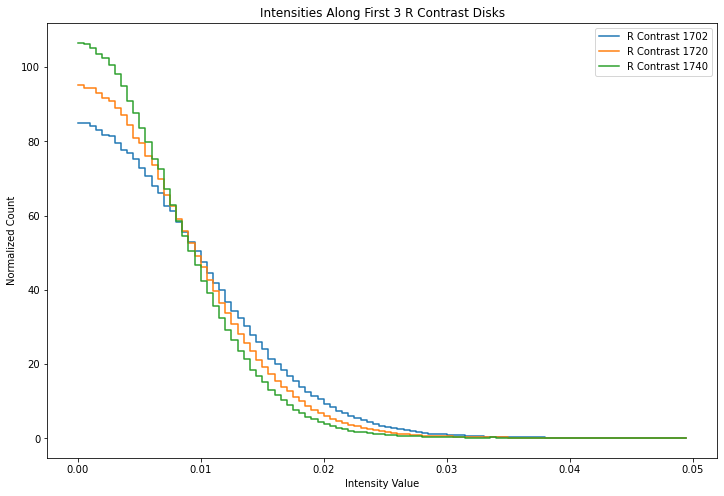

In [66]:
fig = plt.figure(figsize=(12,8))
nbins = 100
hmin = 0
hmax = .05
hist_2,binv = np.histogram(r_intensity_1702,bins=nbins,range=(hmin,hmax))
binv=binv[0:nbins]
norm_2=integrate.trapz(hist_2,binv)
hist_2=hist_2/norm_2
plt.step(binv,hist_2,where='post',label='R Contrast 1702')

nbins = 100
hmin = 0
hmax = .05
hist_2,binv = np.histogram(r_intensity_1720,bins=nbins,range=(hmin,hmax))
binv=binv[0:nbins]
norm_2=integrate.trapz(hist_2,binv)
hist_2=hist_2/norm_2
plt.step(binv,hist_2,where='post',label='R Contrast 1720')

nbins = 100
hmin = 0
hmax = .05
hist_2,binv = np.histogram(r_intensity_1740,bins=nbins,range=(hmin,hmax))
binv=binv[0:nbins]
norm_2=integrate.trapz(hist_2,binv)
hist_2=hist_2/norm_2
plt.step(binv,hist_2,where='post',label='R Contrast 1740')

plt.legend()
plt.title('Intensities Along First 3 R Contrast Disks');plt.xlabel('Intensity Value');plt.ylabel('Normalized Count')
plt.show()

In [45]:
pause()


Pause



# Part Cii

Uses the found histogram data from above to calculate each time series variance over time.

In [60]:
print('Part Cii: Finding the second moment values of the displayed histograms...')

#takes the intensity data, finds the mean, then finds the variance of the data set
def variance(data):
    n = len(data)
    mean = np.mean(data) #finding mean of the data
    arr = []
    for i in range(n):
        x = (data[i] - mean)**2 #calculates variance using each data point
        arr.append(x)
    return sum(arr) * (1/n)

Part Cii: Finding the second moment values of the displayed histograms...


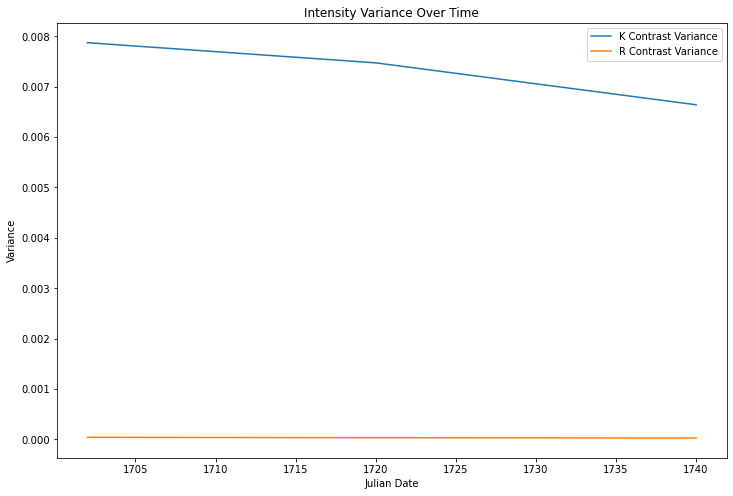

In [62]:
times = [1702,1720,1740]
k_variance = [variance(k_intensity_1702),variance(k_intensity_1720),variance(k_intensity_1740)]
r_variance = [variance(r_intensity_1702),variance(r_intensity_1720),variance(r_intensity_1740)]

plt.figure(figsize=(12,8))
plt.plot(times,k_variance,label='K Contrast Variance')
plt.plot(times,r_variance,label='R Contrast Variance')
plt.legend()
plt.title('Intensity Variance Over Time');plt.xlabel('Time');plt.ylabel('Variance')
plt.show()